In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Load the Data
df = pd.read_csv("~/Datasets/California House Price/Cal_house/housing.csv") 

In [97]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [98]:
df.shape

(20640, 10)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [100]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [101]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

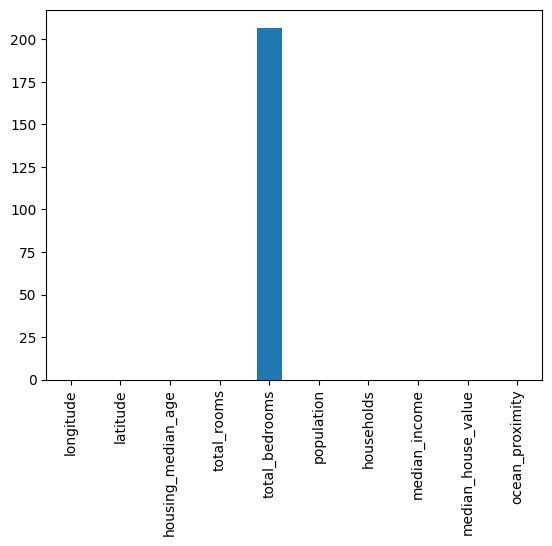

In [102]:
missing = df.isnull().sum()
missing.plot(kind="bar")

In [103]:
# Fill the missing values 

df.fillna(df["total_bedrooms"].mean(), inplace=True)

In [104]:
# Duplicated Values 
df.duplicated().sum()

np.int64(0)

In [105]:
num_cols = [col for col in df.columns if df[col].dtype in ["float64","int64"]]

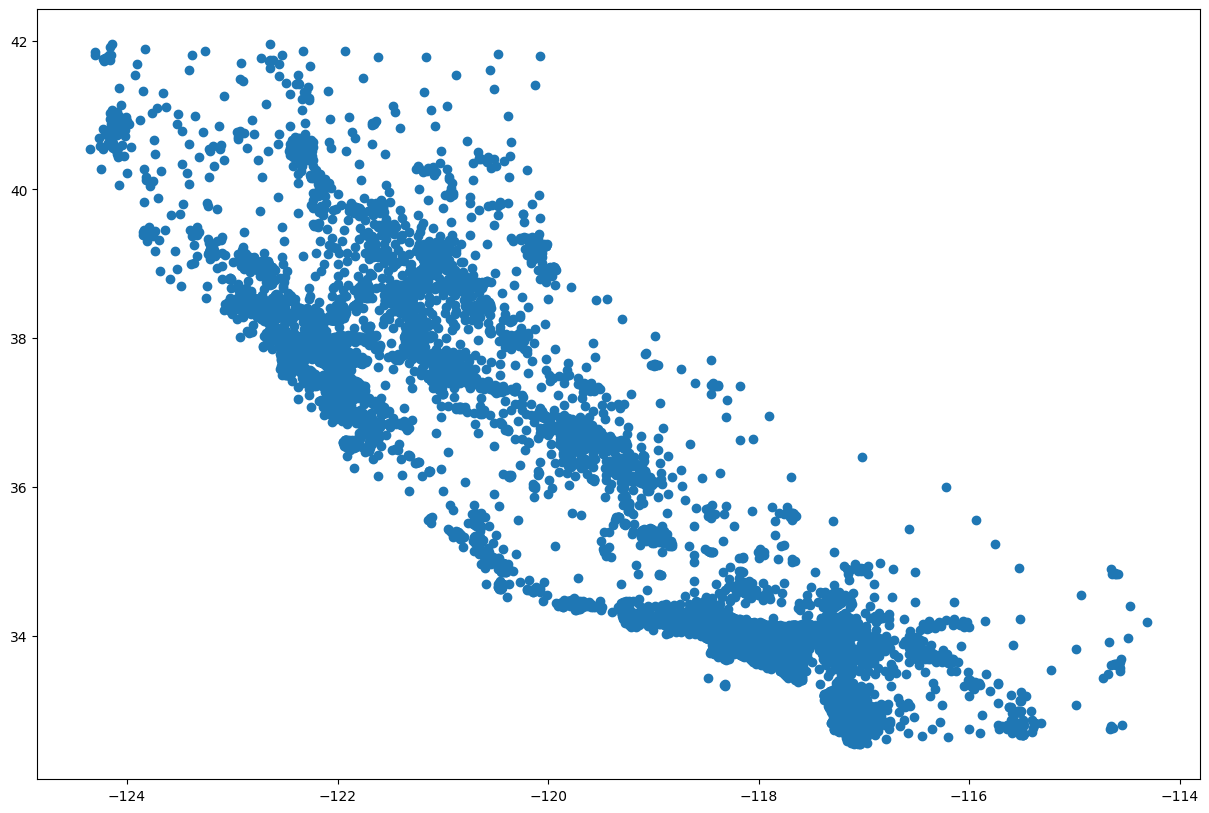

In [106]:
plt.figure(figsize=(15, 10))
plt.scatter(df["longitude"], df["latitude"])

In [107]:
corr_matrix = df[num_cols].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: >

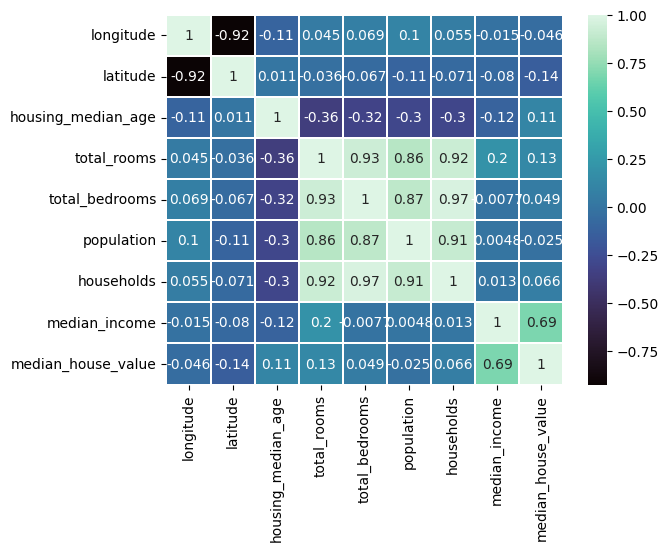

In [108]:
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("mako", as_cmap=True), linewidths=0.2)

In [109]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [110]:
# Change the datatype
df["housing_median_age"] = df["housing_median_age"].astype("int64")
df["total_rooms"] = df["total_rooms"].astype("int64")
df["total_bedrooms"] = df["total_bedrooms"].astype("int64")
df["population"] = df["population"].astype("int64")
df["households"] = df["households"].astype("int64")
df["median_house_value"] = df["median_house_value"].astype("int64")
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

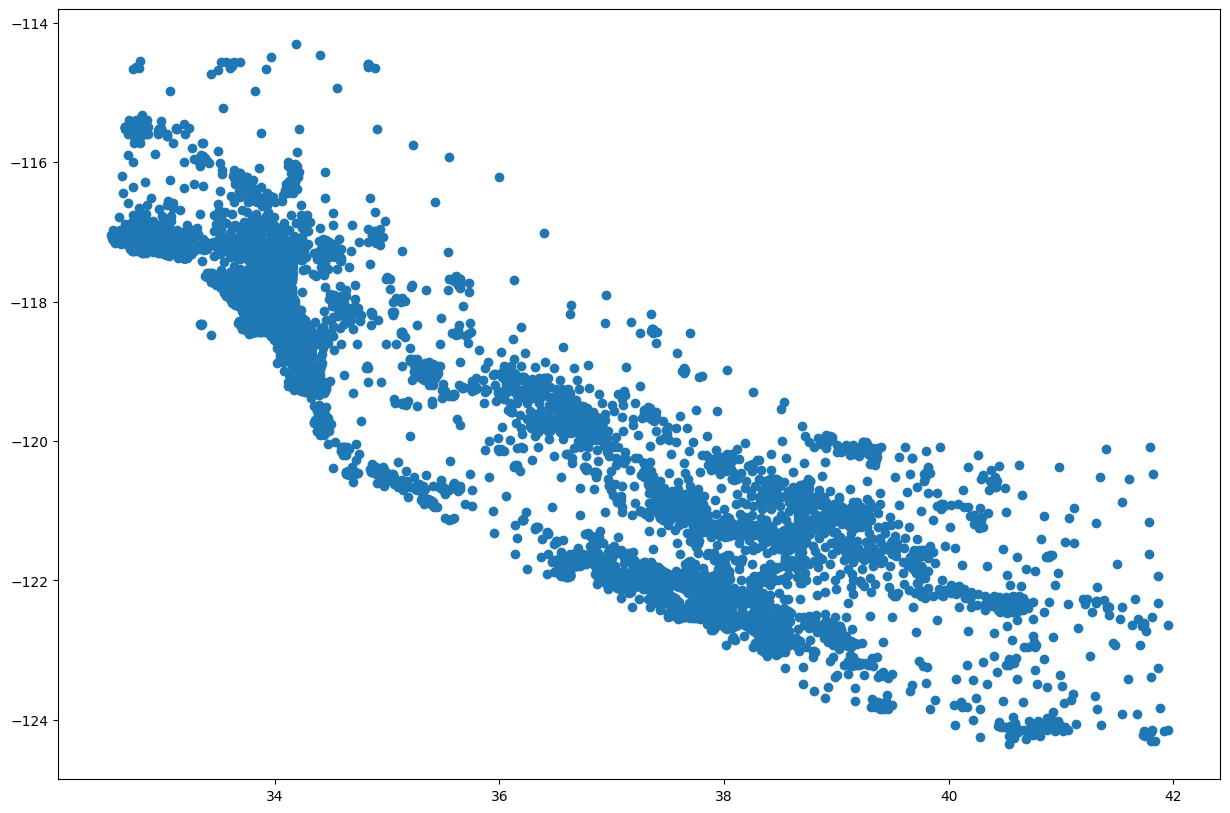

In [111]:
plt.figure(figsize=(15, 10))
plt.scatter(df["latitude"], df["longitude"])

In [112]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [113]:
longitude = df["longitude"]
latitue = df["latitude"]

In [114]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY


In [115]:
cat_cols = [col for col in df.columns if df[col].dtype not in ["float64", "int64"]]

In [116]:
# Encode the cat  col
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first")

encoder = one_hot.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoder, columns=one_hot.get_feature_names_out(cat_cols))

encoded_df = pd.concat([df,encoded_df], axis=1)

In [117]:
encoded_df = encoded_df.drop("ocean_proximity", axis=1)

In [118]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,1.0,0.0


In [119]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,1.0,0.0


In [120]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,1.0,0.0


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("median_house_value", axis=1), encoded_df["median_house_value"], test_size=0.2, random_state=42)

In [122]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_sk = lr.predict(X_test)

In [124]:
from sklearn.metrics import r2_score

r2_score_sk = r2_score(y_test, y_pred_sk)

r2_score_sk

0.6257361394054031

In [125]:
class Multiple_Linear_Regression():

    def __init__(self):
        
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0,1, axis=1)

        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        self.coef_ = betas[1:]
        self.intercept_ = betas[0]

    def predict(self, X_test):
        y_pred = self.intercept_ + np.dot(X_test, self.coef_)
        return y_pred

In [126]:
mlr = Multiple_Linear_Regression()

mlr.fit(X_train, y_train)

In [127]:
y_pred_ml = mlr.predict(X_test)

In [130]:
def r2_score_custom(y_true, y_pred):

    mean_value = np.mean(y_true)

    SSE = np.sum((y_true - y_pred) ** 2)
    TSS = np.sum((y_true - mean_value) ** 2)
    r2_score = 1 - (SSE / TSS)
    return r2_score

In [131]:
r2_score_c = r2_score_custom(y_test, y_pred_ml)

r2_score_c

np.float64(0.6257361394054035)